## 前情函数
### tensorflow.one_hot
tf.one_hot(
indices,<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;depth,<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;on_value=None,<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;off_value=None,<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;axis=None,<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;dtype=None,<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;name=None<br>
)  
仅介绍最常用的使用方法  
depth：表示独热编码的向量长度  
indices：输入的数据，可以是列表，数组，矩阵等  
dtype：数据类型，整型或者浮点型

In [1]:
import tensorflow as tf
import numpy as np


x_list = [3, 4]
x_list_onehot = tf.one_hot(x_list, depth=10)
print('x_list type:', type(x_list),
      '\nx_list:', x_list,
      '\nx_list_onehot:\n',x_list_onehot.numpy())

x_array = np.array([3, 4])
x_array_onehot = tf.one_hot(x_array, depth=10, dtype=tf.int32)
print('x_array type:', type(x_array),
      '\nx_array:', x_array,
      '\nx_array_onehot:\n',x_array_onehot.numpy())

x_list type: <class 'list'> 
x_list: [3, 4] 
x_list_onehot:
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
x_array type: <class 'numpy.ndarray'> 
x_array: [3 4] 
x_array_onehot:
 [[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]


## 基于 onehot 编码

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math


tf.__version__

'2.0.0'

### 读取文件  
文件路径为 C:\Users\your_user_name\.keras\datasets

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 显示数据维度  
tensorflow2.x 与 tensorflow1.x 数据的形式不一样，在后面的显示图像函数将会与 tensorflow1.x 不同，数据集的存储的像素点格式是 unit8，范围是 0~255

In [4]:
print('Train image shape:', train_images.shape, 'Train label shape:', train_labels.shape)
print('Test image shape:', test_images.shape, 'Test label shape:', test_labels.shape)
print('images dtype:', type(train_images[0, 0, 0]))

Train image shape: (60000, 28, 28) Train label shape: (60000,)
Test image shape: (10000, 28, 28) Test label shape: (10000,)
images dtype: <class 'numpy.uint8'>


### 显示训练集图像

In [5]:
def plot_num_images(num):
    if num < 1:
        print('INFO:The number of input pictures must be greater than zero!')
    else:
        choose_list = []
        for i in range(num):
            choose_n = np.random.randint(train_images.shape[0])
            choose_list.append(choose_n)
        fig = plt.gcf()
        fig.set_size_inches(18, 5 * math.ceil(num / 3))
        for i in range(num):
            ax_img = plt.subplot(math.ceil(num / 3), 3, i + 1)
            plt_img = train_images[choose_list[i]]
            ax_img.imshow(plt_img, cmap='binary')
            ax_img.set_title('label:' + str(train_labels[choose_list[i]]),
                             fontsize=10)
        plt.show()

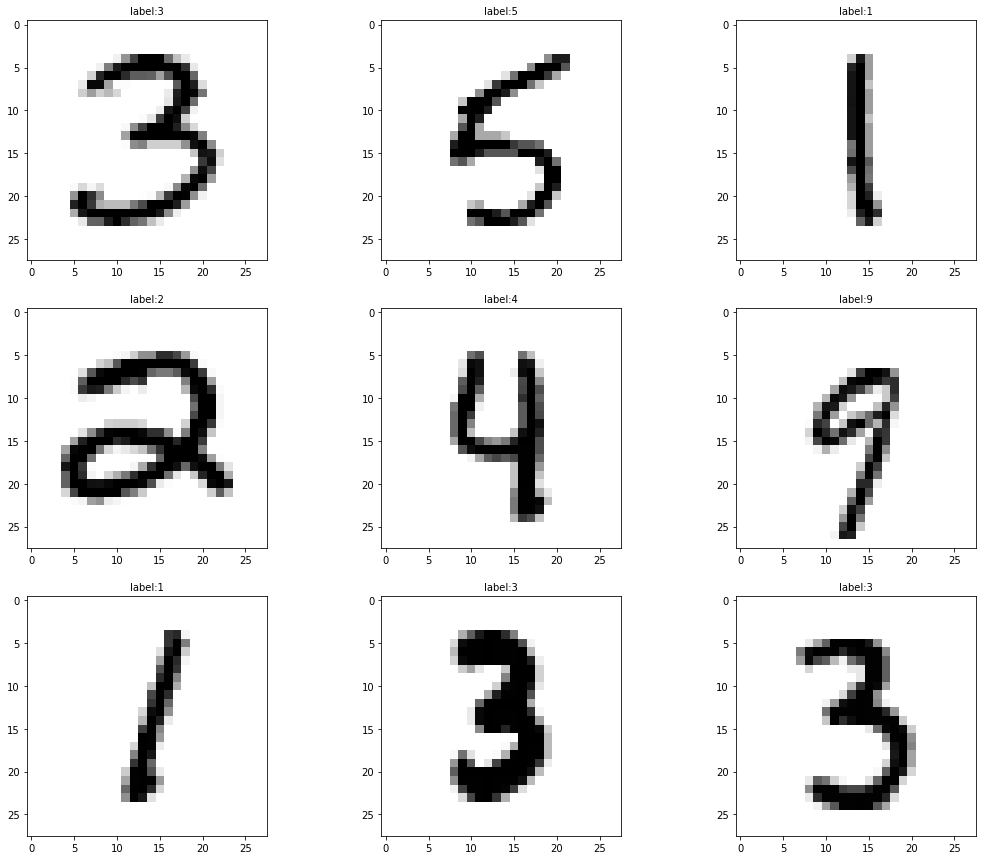

In [6]:
plot_num_images(9)

### 划分验证集

In [7]:
total_num = len(train_images)
valid_split = 0.2
train_num = int(total_num * (1 - valid_split))

train_x = train_images[:train_num]
train_y = train_labels[:train_num]

valid_x = train_images[train_num:]
valid_y = train_labels[train_num:]

test_x = test_images
test_y = test_labels

### 查看验证集 scale

In [8]:
print('validation dataset scale:', valid_x.shape)

validation dataset scale: (12000, 28, 28)


### 数据 flattern

In [9]:
train_x = train_x.reshape(-1, 784)
valid_x = valid_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

### 数据归一化与独热码

In [10]:
train_x = tf.cast(train_x / 255.0, tf.float32)
valid_x = tf.cast(valid_x / 255.0, tf.float32)
test_x = tf.cast(test_x / 255.0, tf.float32)

train_y = tf.one_hot(train_y, depth=10)
valid_y = tf.one_hot(valid_y, depth=10)
test_y = tf.one_hot(test_y, depth=10)

print('*******demo*******')
valid_y

*******demo*******


<tf.Tensor: id=25, shape=(12000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

### 模型定义
前向计算

In [11]:
def model(x, w, b):
    pred = tf.matmul(x, w) + b
    return tf.nn.softmax(pred)

### 创建变量

In [12]:
W = tf.Variable(tf.random.normal([784, 10], mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros([10]), name='B')

### 定义损失函数

In [13]:
def loss(x, y, w, b):
    pred = model(x, w, b)
    loss_ = tf.keras.losses.categorical_crossentropy(y_true=y, y_pred=pred)
    return tf.reduce_mean(loss_)

### 模型训练参数设置

In [14]:
epochs = 40
batch_size = 50
learning_rate = 0.001

### 定义梯度计算函数

In [15]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])

### 设置优化器

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

### 定义准确率

In [17]:
def accuracy(x, y, w, b):
    pred = model(x, w, b)
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### 模型训练

In [18]:
total_step = int(train_num / batch_size)

loss_list_train = []
loss_list_valid = []
acc_list_train = []
acc_list_valid = []

for epoch in range(epochs):
    for step in range(total_step):
        xs = train_x[step * batch_size:(step + 1) * batch_size]
        ys = train_y[step * batch_size:(step + 1) * batch_size]
        
        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads, [W, B]))
    loss_train = loss(train_x, train_y, W, B).numpy()
    loss_valid = loss(valid_x, valid_y, W, B).numpy()
    acc_train = accuracy(train_x, train_y, W, B).numpy()
    acc_valid = accuracy(valid_x, valid_y, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print('Epoch: %2d' % (epoch + 1),
          'train_loss= %6f' % loss_train,
          'train_acc=%6f' % acc_train,
          'val_loss= %6f' % loss_valid,
          'val_acc=%4f' % acc_valid)
print('INFO:Train Finished!')

Epoch:  1 train_loss= 1.794028 train_acc=0.663083 val_loss= 1.688922 val_acc=0.675667
Epoch:  2 train_loss= 1.026453 train_acc=0.787437 val_loss= 0.956573 val_acc=0.796583
Epoch:  3 train_loss= 0.784511 train_acc=0.833396 val_loss= 0.735276 val_acc=0.839833
Epoch:  4 train_loss= 0.665004 train_acc=0.856875 val_loss= 0.629650 val_acc=0.864167
Epoch:  5 train_loss= 0.592476 train_acc=0.871167 val_loss= 0.567846 val_acc=0.875583
Epoch:  6 train_loss= 0.543093 train_acc=0.880000 val_loss= 0.526859 val_acc=0.883833
Epoch:  7 train_loss= 0.506531 train_acc=0.886771 val_loss= 0.497269 val_acc=0.889583
Epoch:  8 train_loss= 0.478374 train_acc=0.891437 val_loss= 0.474750 val_acc=0.893000
Epoch:  9 train_loss= 0.455545 train_acc=0.894813 val_loss= 0.456882 val_acc=0.895000
Epoch: 10 train_loss= 0.436355 train_acc=0.898396 val_loss= 0.442191 val_acc=0.898250
Epoch: 11 train_loss= 0.420245 train_acc=0.901312 val_loss= 0.429889 val_acc=0.900250
Epoch: 12 train_loss= 0.406171 train_acc=0.903313 val_

### 损失率与准确率可视化

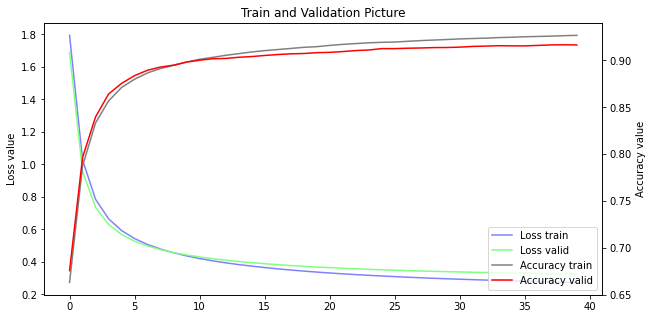

In [19]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(111)
ax1.set_title('Train and Validation Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(loss_list_train, color=(0.5, 0.5, 1.0), label='Loss train')
line2, = ax1.plot(loss_list_valid, color=(0.5, 1.0, 0.5), label='Loss valid')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line3, = ax2.plot(acc_list_train, color=(0.5, 0.5, 0.5), label='Accuracy train')
line4, = ax2.plot(acc_list_valid, color=(1, 0, 0), label='Accuracy valid')
plt.legend(handles=(line1, line2, line3, line4), loc='best')
plt.show()

### 模型评估

In [20]:
acc_test = accuracy(test_x, test_y, W, B).numpy()
print('Test Accuracy:', acc_test)

Test Accuracy: 0.9162


### 模型应用

In [21]:
def plot_apply_images(num):
    if num < 1:
        print('INFO:The number of input pictures must be greater than zero!')
    else:
        choose_list = []
        for i in range(num):
            choose_n = np.random.randint(len(test_x))
            choose_list.append(choose_n)
        fig = plt.gcf()
        fig.set_size_inches(18, 5 * math.ceil(num / 3))
        
        pred = model(test_x, W, B)
        prediction_result = tf.argmax(pred, 1).numpy()

        for i in range(num):
            ax_img = plt.subplot(math.ceil(num / 3), 3, i + 1)
            plt_img = test_images[choose_list[i]]
            ax_img.imshow(plt_img, cmap='binary')
            ax_img.set_title('Original label:' \
                             + str(test_labels[choose_list[i]]) \
                             + ' Predict label:' \
                             + str(prediction_result[choose_list[i]]),
                             fontsize=10)
            ax_img.set_xticks([])
            ax_img.set_yticks([])
        plt.show()

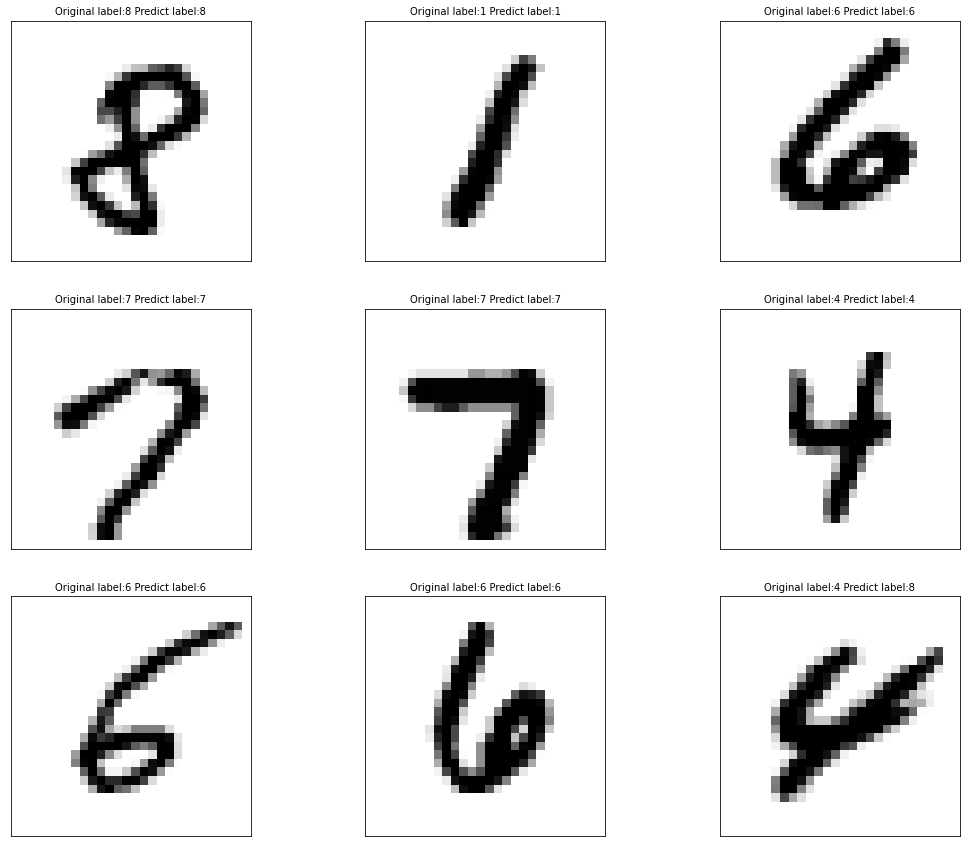

In [22]:
plot_apply_images(9)

## 基于整数型标签

In [23]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
total_num = len(train_images)
valid_split = 0.2
train_num = int(total_num * (1 - valid_split))

train_x = train_images[:train_num]
train_y = train_labels[:train_num]

valid_x = train_images[train_num:]
valid_y = train_labels[train_num:]

test_x = test_images
test_y = test_labels

In [25]:
train_x = train_x.reshape(-1, 784)
valid_x = valid_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

In [26]:
train_x = tf.cast(train_x / 255.0, tf.float32)
valid_x = tf.cast(valid_x / 255.0, tf.float32)
test_x = tf.cast(test_x / 255.0, tf.float32)

In [27]:
def model(x, w, b):
    pred = tf.matmul(x, w) + b
    return tf.nn.softmax(pred)

In [28]:
W = tf.Variable(tf.random.normal([784, 10], mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros([10]), name='B')

In [29]:
def loss(x, y, w, b):
    pred = model(x, w, b)
    loss_ = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=pred)
    return tf.reduce_mean(loss_)

In [30]:
epochs = 40
batch_size = 50
learning_rate = 0.001

In [31]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [33]:
def accuracy(x, y, w, b):
    pred = model(x, w, b)
    correct_prediction = tf.equal(tf.argmax(pred, 1), y)
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [34]:
total_step = int(train_num / batch_size)

loss_list_train = []
loss_list_valid = []
acc_list_train = []
acc_list_valid = []

for epoch in range(epochs):
    for step in range(total_step):
        xs = train_x[step * batch_size:(step + 1) * batch_size]
        ys = train_y[step * batch_size:(step + 1) * batch_size]
        
        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads, [W, B]))
    loss_train = loss(train_x, train_y, W, B).numpy()
    loss_valid = loss(valid_x, valid_y, W, B).numpy()
    acc_train = accuracy(train_x, train_y, W, B).numpy()
    acc_valid = accuracy(valid_x, valid_y, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print('Epoch: %2d' % (epoch + 1),
          'train_loss= %6f' % loss_train,
          'train_acc=%6f' % acc_train,
          'val_loss= %6f' % loss_valid,
          'val_acc=%4f' % acc_valid)
print('INFO:Train Finished!')

Epoch:  1 train_loss= 1.630926 train_acc=0.684563 val_loss= 1.520867 val_acc=0.700000
Epoch:  2 train_loss= 1.012482 train_acc=0.790854 val_loss= 0.959439 val_acc=0.802167
Epoch:  3 train_loss= 0.793968 train_acc=0.833063 val_loss= 0.764571 val_acc=0.839833
Epoch:  4 train_loss= 0.678524 train_acc=0.853562 val_loss= 0.661618 val_acc=0.858167
Epoch:  5 train_loss= 0.604963 train_acc=0.865708 val_loss= 0.595957 val_acc=0.870250
Epoch:  6 train_loss= 0.553632 train_acc=0.875583 val_loss= 0.550357 val_acc=0.876667
Epoch:  7 train_loss= 0.515726 train_acc=0.882583 val_loss= 0.516921 val_acc=0.882417
Epoch:  8 train_loss= 0.486057 train_acc=0.887333 val_loss= 0.491046 val_acc=0.886333
Epoch:  9 train_loss= 0.462157 train_acc=0.890958 val_loss= 0.470663 val_acc=0.889917
Epoch: 10 train_loss= 0.442267 train_acc=0.893729 val_loss= 0.453869 val_acc=0.893250
Epoch: 11 train_loss= 0.425563 train_acc=0.896375 val_loss= 0.439977 val_acc=0.895083
Epoch: 12 train_loss= 0.411025 train_acc=0.899437 val_

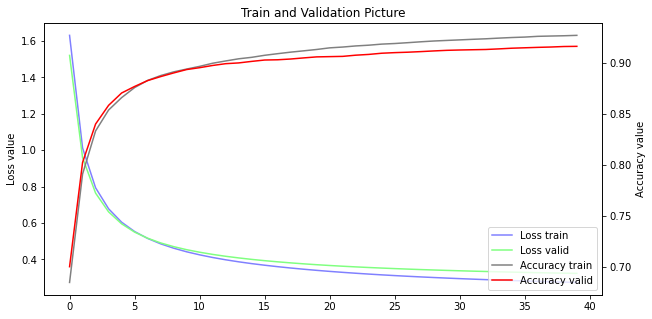

In [35]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(111)
ax1.set_title('Train and Validation Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(loss_list_train, color=(0.5, 0.5, 1.0), label='Loss train')
line2, = ax1.plot(loss_list_valid, color=(0.5, 1.0, 0.5), label='Loss valid')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line3, = ax2.plot(acc_list_train, color=(0.5, 0.5, 0.5), label='Accuracy train')
line4, = ax2.plot(acc_list_valid, color=(1, 0, 0), label='Accuracy valid')
plt.legend(handles=(line1, line2, line3, line4), loc='best')
plt.show()